# Exercise 5

## Computing the Maximum Lyapunov Exponent

* Investigate how two trajectories that start only small pertubation $\delta_0$ apart diverge from each other:
    * Start from a random initial initial conditions and solve the Lorenz equation far enough so that the trajectory ends on the attractor 
    * Take the last point of that "transient" as a new initial condition. From that point on solve two trajectories $\mathbf{x}_1$ and $\mathbf{x}_2$, one perturbed by a small value $\delta_0$
    * Plot both trajectories in the same plot, what do you observe? 
    * Now compute $\delta(t) = ||\mathbf{x}_1 - \mathbf{x}_2||$ and plot it on a logarithmic scale. Why does $\delta(t)$ saturate and doesn't increase further at some point?


* Estimate the maximum Lyapunov exponent $\lambda_{\max}$ of the Lorenz equation by: 
    * $N$ times repeat the previous steps to compute $\delta(t)$ from different initial conditions
    * We know that $\delta(t) \approx \delta_0 e^{\lambda_{max}t}$
    * You can construct a time axis by using the $\Delta t$ from the `trajectory` command
    * Estimate $\lambda_{max}$ for each trial by computing the slope in the logartihmic plot. You can do this by performing a linear regression
        * When $y=a*x+b$, in matrix form we can write it as $\begin{pmatrix}y_1\\y_2\\...\end{pmatrix} = \begin{pmatrix}b & a\end{pmatrix} \begin{pmatrix}1 & x_1\\1 &x_2\\...\end{pmatrix}$ or $\mathbf{y}=\mathbf{c}\mathbf{X}$, which you can solve via `X \ y`
    * Return the average $\lambda_{max}$ of your $N$ trials
    * Remember to also write a doc string for your routine 

* Compare your estimate to the routine from `DynamicalSystems.jl` called `lyapunov`.




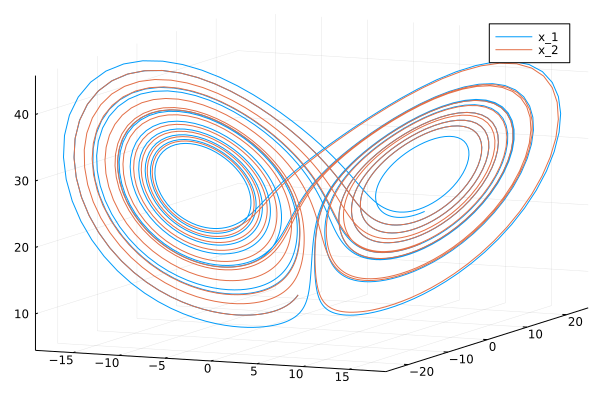

In [180]:
using DynamicalSystems, StatsBase, Plots


ds = DynamicalSystems.Systems.lorenz()

u₀ = 10 .*(rand(3) .- 0.5)
transient = trajectory(ds, 0., u₀, Ttr=30.)
tr_1 = Matrix(trajectory(ds, 15.,transient[1,:]))
tr_2 = Matrix(trajectory(ds, 15.,transient[1,:] .+ 0.01))
δ = sqrt.(sum(abs2,tr_1 - tr_2,dims=2))

plot(tr_1[:,1], tr_1[:,2], tr_1[:,3], label="x_1")
plot!(tr_2[:,1], tr_2[:,2], tr_2[:,3], label="x_2")


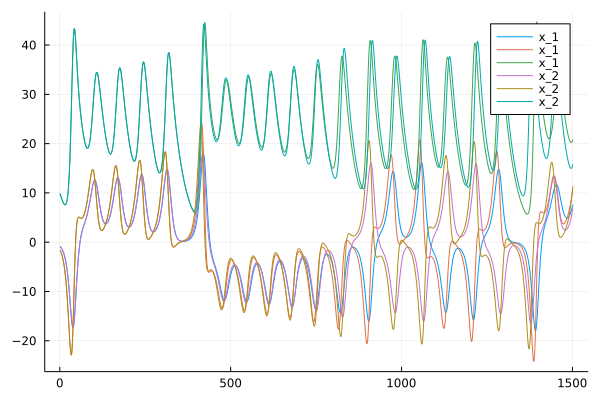

In [181]:
plot(tr_1, label="x_1")
plot!(tr_2, label="x_2")

The trajectories are very close to each other until about 350-400 time steps where they start to diverge from each other

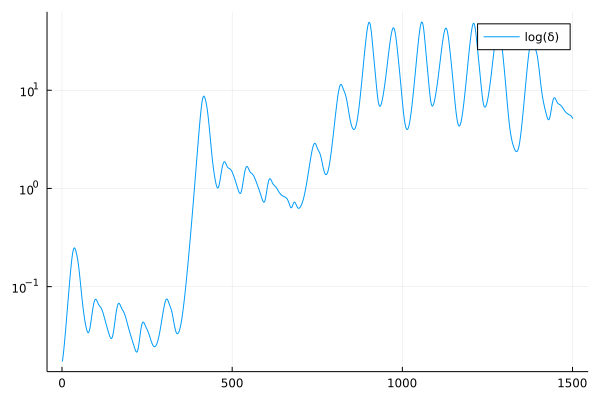

In [185]:
plot(δ, yaxis=:log, label="log(δ)")

$\delta(t)$ flucatuates but increases exponentially (so linear in the log plot) until it satuarates. Both trajectories remain on the attractor, so that distances has an upper limit.

In [187]:
"""
    maximum_lyapunov(ds; N=1000, T=10., Ttr=30.,δ0=0.0001, dt=0.01)

Estimate the maximum Lyapunov by fitting a line to the logarithmic pertubation evolution δ(t). 

# Keyword Arguments

* `N`: number of trials 
* `T`: time the system is evolved 
* `Ttr`: transient time that the system is initialy evolved 
* `δ0`: initial pertubation 
* `dt`: time step at which the trajectory is saved 
"""
function maximum_lyapunov(ds; N=1000, T=10., Ttr=30.,δ0=0.0001, dt=0.01)

λs = zeros(N)
for i=1:N
    u₀ = 10 .*(rand(3) .- 0.5)
    transient = trajectory(ds, 0., u₀, Ttr=Ttr)
    tr_1 = Matrix(trajectory(ds, T, Δt=dt,transient[1,:]))
    tr_2 = Matrix(trajectory(ds, T, Δt=dt,transient[1,:] .+ δ0))

    δ = sqrt.(sum(abs2,tr_1 - tr_2,dims=2))
    t = Array(0:dt:T)

    M = cat(ones(length(t)), t, dims=2)

    b, a = M \ log.(δ)
    
    λs[i] = a
end 
return mean(λs)
end

maximum_lyapunov

In [189]:
maximum_lyapunov(ds)

0.8775005782873626

In [190]:
DynamicalSystems.lyapunov(ds,1000)

0.8839335541869848

Nice! We are quite close the the estimate from DynamicalSystems.jl!